## Write shapefile from CSV using Pyshp

In [25]:
%matplotlib inline
import pandas as pd
import shapefile #Pyshp
from matplotlib import pyplot as plt

#### Read CSV (11,000 rows) as pandas dataframe

In [2]:
csv = "./Data/variability.csv"

In [3]:
df = pd.read_csv(csv,delimiter= ',')
df.head(2)

,St_ID,Long,Lat,HC,NHC
0,21159,172.27,-41.83,2,2
1,20973,172.27,-41.03,1,1


#### Create instance of the Writer class to begin creating a shapefile

In [4]:
w = shapefile.Writer(shapefile.POINT)

#### Define shapefile fields

In [5]:
w.field('St_ID',decimal=0)
w.field('HC',decimal=0)
w.field('NHC',decimal=0)

#### Iterate through Dataframe rows and add attributes + points

In [6]:
for index, row in df.iterrows():
    w.point(row.Long,row.Lat) # lat/long points
    w.record(row.St_ID,row.HC,row.NHC) # attributes for the points
w.save('./Data/csv_to_pointgeo.shp')

print "Finished creating shapefile"

Finished creating shapefile


#### Plot above created shapefile using pysal

In [36]:
import pysal as ps
from pysal.contrib.viz import mapping as maps

In [29]:
shp = ps.open('./Data/csv_to_pointgeo.shp')

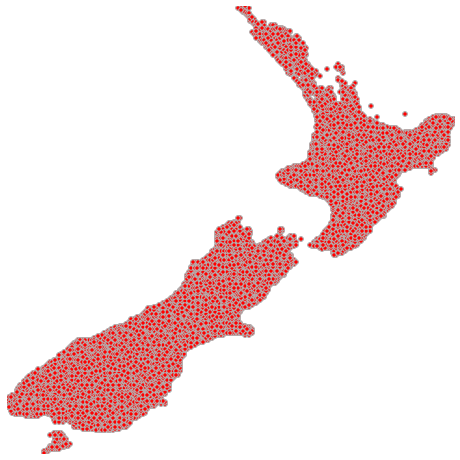

In [28]:
fig = plt.figure(figsize=(8,8))
base = maps.map_point_shp(shp)
ax = maps.setup_ax([base])
base.set_facecolor('red')
base.set_edgecolor('0.7')
fig.add_axes(ax)
plt.show()

### Plot using an attribute field in the shapefile

In [37]:
import numpy as np

In [38]:
# for this we need dfb of the shapefile
dbf = ps.open('./Data/csv_to_pointgeo.dbf')

In [52]:
# attribute values stored in a numpy array
HC = np.array(dbf.by_col("HC"))

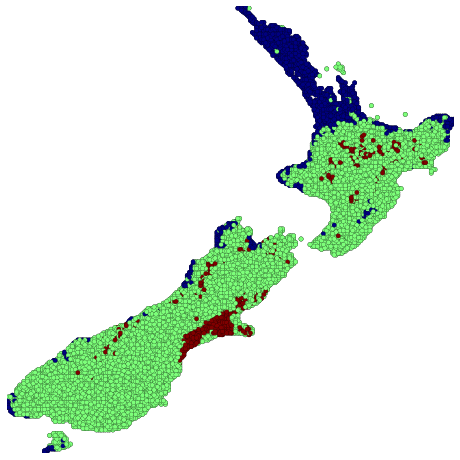

In [53]:
fig = plt.figure(figsize=(8,8))
# assign color template to the attribute values
attribute = maps.base_choropleth_unique(maps.map_point_shp(shp), HC)
attribute.set_linewidth('0.2')
# setup and add to axes
ax = maps.setup_ax([attribute])
fig.add_axes(ax)
plt.show()